<a href="https://colab.research.google.com/github/Anand1923/DSA_Assignments/blob/main/Case_study_09_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Week14_Wine.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#Normalizing the data

In [ ]:
from sklearn.preprocessing import Normalizer
data = pd.DataFrame(Normalizer().fit_transform(data), columns=data.columns)


#Unsupervised learning
#1) KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

Elbow diagram to deterine K value

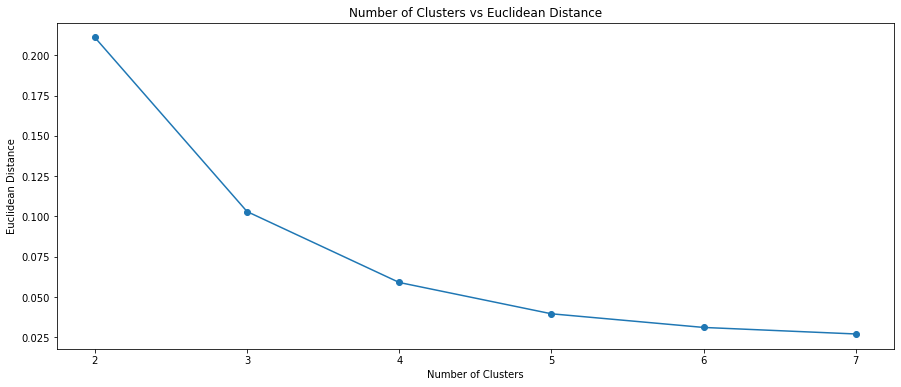

In [ ]:
kpoints = range(2,8)
inertias = []
for k in kpoints:
    inertias.append(KMeans(n_clusters=k, init = "k-means++", random_state=42).fit(data).inertia_)
plt.figure(figsize = (15, 6))
plt.plot(kpoints, inertias, "-o")
plt.title("Number of Clusters vs Euclidean Distance")
plt.xlabel("Number of Clusters")
plt.ylabel("Euclidean Distance")
plt.show()

We got optimal K value as 5

In [ ]:
model_kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
model_kmeans.fit(data)
kmean_clusters = model_kmeans.labels_

kmean_clusters

array([1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 0, 1, 0, 4, 1,
       3, 3, 1, 0, 1, 0, 3, 1, 1, 0, 0, 0, 3, 0, 4, 1, 1, 3, 3, 0, 3, 3,
       1, 1, 3, 3, 3, 4, 4, 3, 0, 0, 1, 0, 1, 3, 0, 0, 1, 4, 3, 3, 4, 1,
       3, 4, 3, 0, 0, 0, 3, 4, 0, 3, 3, 4, 4, 0, 0, 0, 0, 0, 4, 1, 3, 0,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 0, 1, 1, 0, 0, 0, 4, 1,
       3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       1, 3], dtype=int32)

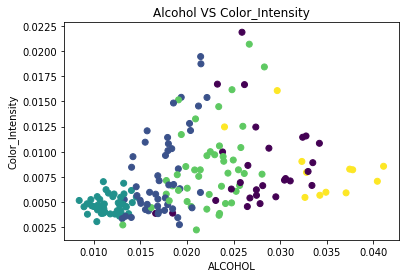

In [ ]:
plt.title("Alcohol VS Color_Intensity")
plt.scatter(data["Alcohol"], data["Color_Intensity"], c = kmean_clusters)
plt.xlabel("ALCOHOL")
plt.ylabel("Color_Intensity")
plt.show()

In [ ]:
data1=data[['Alcohol','Proline']]
data1

,Alcohol,Proline
0,14.23,1065
1,13.20,1050
2,13.16,1185
3,14.37,1480
4,13.24,735
...,...,...
173,13.71,740
174,13.40,750
175,13.27,835
176,13.17,840


In [ ]:
model_kmeans = KMeans(n_clusters=5, init = "k-means++", random_state=42)
model_kmeans.fit(data1)
kmean_pred=model_kmeans.fit_predict(data1)

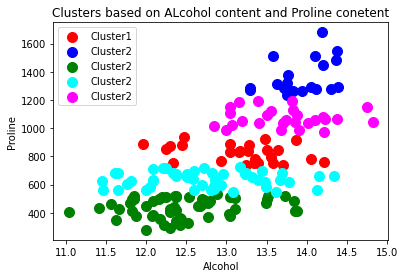

In [ ]:

plt.scatter(data1[kmean_pred == 0,0] , data1[kmean_pred == 0, 1], s=100 ,c='red',label='Cluster1')
plt.scatter(data1[kmean_pred == 1,0] , data1[kmean_pred == 1, 1], s=100 ,c='blue',label='Cluster2')
plt.scatter(data1[kmean_pred == 2,0] , data1[kmean_pred == 2, 1], s=100 ,c='green',label='Cluster2')
plt.scatter(data1[kmean_pred == 3,0] , data1[kmean_pred == 3, 1], s=100 ,c='cyan',label='Cluster2')
plt.scatter(data1[kmean_pred == 4,0] , data1[kmean_pred == 4, 1], s=100 ,c='magenta',label='Cluster2')
plt.title('Clusters based on ALcohol content and Proline conetent')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.legend()
plt.show()

#2) Agglomerative Clustering

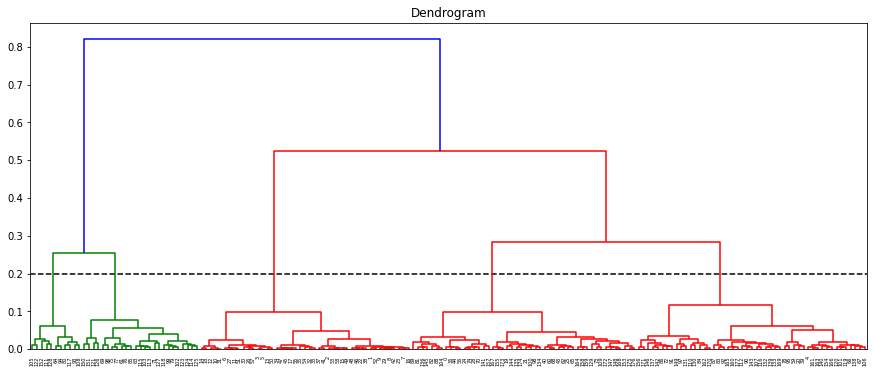

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (15, 6))
plt.title("Dendrogram")
plt.hlines(0.2, 0, 5000, linestyles="dashed")
dend = dendrogram(linkage(data, method = "ward"))

k=5

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model_ag = AgglomerativeClustering(n_clusters= 5, affinity= "euclidean", linkage = "ward").fit(data)
agglo_clusters = model_ag.labels_

In [ ]:
agglo_clusters

array([1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 3, 1, 3, 4, 1,
       0, 0, 1, 3, 1, 3, 0, 1, 1, 3, 3, 3, 0, 3, 4, 1, 1, 0, 0, 3, 0, 0,
       1, 1, 0, 0, 0, 4, 4, 0, 3, 0, 1, 3, 1, 0, 3, 3, 1, 4, 0, 0, 4, 1,
       0, 4, 0, 3, 3, 3, 0, 4, 3, 0, 0, 3, 4, 3, 3, 3, 3, 3, 4, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 3, 4, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0])

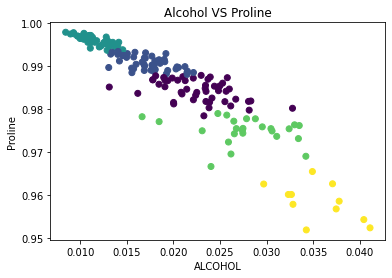

In [ ]:
plt.title("Alcohol VS Proline")
plt.scatter(data["Alcohol"], data["Proline"], c = agglo_clusters)
plt.xlabel("ALCOHOL")
plt.ylabel("Proline")
plt.show()

In [ ]:
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


Model with 5 clusters will be optimium for this dataset